# SETUP 

In [74]:
import sys
import os
from pathlib import Path

modulepath = Path.cwd().parent / "utils"
modulepath = str(modulepath)
projectpath = Path.cwd().parent
projectpath = str(projectpath)
if modulepath not in sys.path:
    sys.path.insert(0,str(modulepath))
if projectpath not in sys.path:
    sys.path.insert(0,str(projectpath))  
print(sys.path)

['c:\\Users\\oriol\\GitHub_Repos\\CNN-classification', 'c:\\Users\\oriol\\GitHub_Repos\\CNN-classification\\utils', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch\\python312.zip', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch\\DLLs', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch\\Lib', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch', '', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch\\Lib\\site-packages', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch\\Lib\\site-packages\\win32', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch\\Lib\\site-packages\\Pythonwin']


# TRAIN

In [283]:
import torch
from torch import nn

from utils.engine import train
from utils.model_architectures import TinyVGG_1
from utils.data_loaders import create_train_test_dataloaders
from utils.helpers import create_writer
from utils.helpers import create_dataframe
from utils.helpers import hyperparameter_combinations
from utils.helpers import save_dataframe
from utils.helpers import create_and_save_experiment_metadata

device = "cuda" if torch.cuda.is_available() else "cpu"
#SEED = 0
#torch.manual_seed(SEED)
# There are other sources of randomness, so manual_seed does not enable 
# reproducibility

#next(model.parameters()).is_cuda #check if model on cuda
#from torchinfo import summary
#summary(tvgg,input_size=[32,1,28,28])

# A Hyperparameter named Iter controls the number of iterations for a given
# set of hyperparameters
HYPERPARAMETERS = {'Hidden_Channels': [20],
                   'Epochs': [2],
                   'lr': [0.1],
                   'Iter': [2],
                   'Size': [0.05],
                   'Fruit': ["Oranges","Apples"]
                   }

experiment_name = "Try_categorical_HP"
hp_combinations = hyperparameter_combinations(HYPERPARAMETERS)
hp_keys = HYPERPARAMETERS.keys()

for combination in hp_combinations:
    HIDDEN_CHANNELS = combination["Hidden_Channels"]
    NUM_EPOCHS = combination["Epochs"]
    LR = combination["lr"]
        # HIDDEN_CHANNELS, NUM_EPOCHS, LR have to be specified, cannot be none
    ITER = combination["Iter"] if "Iter" in hp_keys else None 
        # ITER Defaults to 1 when None
    SIZE = combination["Size"] if "Size" in hp_keys else None 
        # SIZE Defaults to 1.0 when None

    train_dataloader, test_dataloader = create_train_test_dataloaders(size=SIZE) #type: ignore

    # create multiple models and optimizers, one pair for every iteration
    model_0 = []
    optimizer_0 = []
    if ITER:
        n_iters = ITER
    else:
        n_iters = 1
    for n in range(n_iters):
        mod = TinyVGG_1(input_shape=1,hidden_channels=HIDDEN_CHANNELS,output_shape=10).to(device)
        model_0.append(mod)
        optimizer_0.append(torch.optim.SGD(params=mod.parameters(),lr=LR))

    loss_fn = nn.CrossEntropyLoss()

    model_name = model_0[0]._get_name()
    #model_name = "Model_3"

    extra = ""
    namelist = [str(key)+"_"+str(val)+"_" for key,val in combination.items()]
    for elem in namelist:
        extra += elem
    extra = extra[:-1]

    # Create a writer to save results to tensorboard
    writer = create_writer(experiment_name=experiment_name,
                           model_name=model_name,
                           extra=extra)
    # Train the model for a number of epochs and log the results to tensorboard
    results = train(model=model_0,
                    train_dataloader=train_dataloader,
                    test_dataloader=test_dataloader,
                    optimizer=optimizer_0,
                    loss_fn=loss_fn,
                    epochs=NUM_EPOCHS,
                    iters=ITER,
                    writer=writer)
    # Store additional information on the experiment
    create_and_save_experiment_metadata(experiment_name=experiment_name,
                                        model_name=model_name,
                                        extra=extra,
                                        train_dataloader=train_dataloader,
                                        test_dataloader=test_dataloader,
                                        model=model_0[0],
                                        optimizer=optimizer_0[0],
                                        loss_fn=loss_fn,
                                        epochs=NUM_EPOCHS,
                                        hyperparameters_combination=combination
                                        )
    # Store the results of the accuracy and loss as a dataframe
    df = create_dataframe(results=results,
                          hyperparameters_combination=combination)
    save_dataframe(df=df,
                   model_name=model_name,
                   experiment_name=experiment_name,
                   extra=extra)


[INFO] Created SummaryWriter, saving to: c:\Users\oriol\GitHub_Repos\CNN-classification\experiment_logs\runs\Try_categorical_HP\TinyVGG_1\Hidden_Channels_20_Epochs_2_lr_0.1_Iter_2_Size_0.05_Fruit_Oranges...
Iteration 1


  0%|          | 0/2 [00:00<?, ?it/s]

Iteration 2


  0%|          | 0/2 [00:00<?, ?it/s]

[INFO] Created experiment metadata, saving to: c:\Users\oriol\GitHub_Repos\CNN-classification\experiment_logs\results\Try_categorical_HP\TinyVGG_1\Hidden_Channels_20_Epochs_2_lr_0.1_Iter_2_Size_0.05_Fruit_Oranges...
[INFO] Saving the above results to: c:\Users\oriol\GitHub_Repos\CNN-classification\experiment_logs\results\Try_categorical_HP\TinyVGG_1\Hidden_Channels_20_Epochs_2_lr_0.1_Iter_2_Size_0.05_Fruit_Oranges\Results.feather
[INFO] Created SummaryWriter, saving to: c:\Users\oriol\GitHub_Repos\CNN-classification\experiment_logs\runs\Try_categorical_HP\TinyVGG_1\Hidden_Channels_20_Epochs_2_lr_0.1_Iter_2_Size_0.05_Fruit_Apples...
Iteration 1


  0%|          | 0/2 [00:00<?, ?it/s]

Iteration 2


  0%|          | 0/2 [00:00<?, ?it/s]

[INFO] Created experiment metadata, saving to: c:\Users\oriol\GitHub_Repos\CNN-classification\experiment_logs\results\Try_categorical_HP\TinyVGG_1\Hidden_Channels_20_Epochs_2_lr_0.1_Iter_2_Size_0.05_Fruit_Apples...
[INFO] Saving the above results to: c:\Users\oriol\GitHub_Repos\CNN-classification\experiment_logs\results\Try_categorical_HP\TinyVGG_1\Hidden_Channels_20_Epochs_2_lr_0.1_Iter_2_Size_0.05_Fruit_Apples\Results.feather


# METADATA

In [3]:
def print_metadata(md):
    for key,value in zip(md.keys(),md.values()):
        print(f"{key}: {value}")

In [ ]:
from utils.helpers import retrieve_metadata

md_t3m = retrieve_metadata(experiment_name="Test_3_Models",model_name="TinyVGG_1",extra="Hidden_Channels_30_Epochs_3_lr_0.1_Iter_2_Size_0.11")

In [9]:
print_metadata(md_t3m)

date: 16-09-2025 00:32
experiment name: Test_3_models
model name: TinyVGG_1
learning rate: 0.1
epochs: 3
loss function: CrossEntropyLoss
optimizer name: SGD
dataset: FashionMNIST
training dataset size: 6600
testing dataset size: 1100
batch size: 32
Hyperparams: {'Hidden_Channels': 30, 'Epochs': 3, 'lr': 0.1, 'Iter': 2, 'Size': 0.11}
optimizer params: {'lr': 0.1, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None}
model params: {'layer_1': Sequential(
  (0): Conv2d(1, 30, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1))
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), 'layer_2': Sequential(
  (0): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1))
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation

# Trial and error

In [114]:
from utils.helpers import retrieve_results
from scipy.stats import pearsonr
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
#results = retrieve_results(experiment_name="Big_sweep")
results = retrieve_results()
grouped_res = results.groupby(["Experiment_name","Model_name"])
exp_mod_pairs = list(grouped_res.indices.keys())


[INFO] Retrieving results from c:\Users\oriol\GitHub_Repos\CNN-classification\experiment_logs\results


In [ ]:
#print(results["Experiment_name"].unique())
#print(grouped_res.indices.keys())
#grouped_res.get_group(("Big_sweep","TinyVGG_1"))
#("Big_sweep","TinyVGG_1") in grouped_res.indices.keys()

['Big_sweep' 'lr_sweep_size_01' 'New_model' 'New_model_2' 'Test_3_models'
 'Test_Iter' 'Test_list_1_models' 'Test_list_3_models' 'Test_new_plots_1'
 'Test_new_plots_2' 'Test_single_model']
dict_keys([('Big_sweep', 'TinyVGG_1'), ('New_model', 'Model_2'), ('New_model_2', 'Model_3'), ('Test_3_models', 'TinyVGG_1'), ('Test_Iter', 'TinyVGG_1'), ('Test_list_1_models', 'TinyVGG_1'), ('Test_list_3_models', 'TinyVGG_1'), ('Test_new_plots_1', 'TinyVGG_1'), ('Test_new_plots_2', 'TinyVGG_1'), ('Test_single_model', 'TinyVGG_1'), ('lr_sweep_size_01', 'TinyVGG_1')])


False

In [266]:
exps = ['Big_sweep', 'lr_sweep_size_01', 'New_model']
mods = ['TinyVGG_1','Model_2']
importance_database = {}
for exp in exps:
    for mod in mods:
        if (exp,mod) in exp_mod_pairs:
            df = grouped_res.get_group((exp,mod))
            col_y = "train_loss"
            col_X = df.columns.to_list()[0:df.columns.to_list().index("train_loss")] #type:ignore
            col_X.remove("Iter")
            col_X.append("Epoch #")
            col_X[:] = [col for col in col_X if len(df[col].unique())>1]
            X = df[col_X]       #type:ignore
            y = df[[col_y]]     #type:ignore
            r,p = pearsonr(X,y)
            #print(f"{col_X}\n{r}\n{p}")
            randomForest = RandomForestRegressor(n_estimators=100,
                                                 bootstrap=True,
                                                 criterion='squared_error',
                                                 random_state=0)
            #y.shape
            randomForest.fit(X, y[col_y])
            #pochoimportance = randomForest.feature_importances_
            importance = permutation_importance(randomForest,
                                                X,y,
                                                random_state=0,n_repeats=20)
            importance_database.update(
                {exp:{mod:{"Hyperparameters":col_X,
                           "Correlation":r,
                           "p-value":p,
                           "Importance":importance["importances_mean"]/sum(importance["importances_mean"]),
                           "Uncertainty":importance["importances_std"]}}})
            

In [ ]:
from pandas.api.types import is_object_dtype

importance_database = {}
for exp,mod in grouped_res.indices.keys():#type:ignore
    df = grouped_res.get_group((exp,mod))
    col_y = "train_loss"
    col_X = df.columns.to_list()[0:df.columns.to_list().index("train_loss")] #type:ignore
    col_X.remove("Iter")
    col_X.append("Epoch #")
    # Hyperparameters assessed are all HP that change in value, except for Iter, 
    # and adding Epoch # 
    col_X[:] = [col for col in col_X if len(df[col].unique())>1]
    if col_X == []:
        importance_database.update({exp:{mod:{"Hyperparameters":[],
                                              "Correlation":[],
                                              "p-value":[],
                                              "Importance":[],
                                              "Uncertainty":[] }}})
        continue


    # if any of the hyperparameters is categorical we drop it since both tests 
    # are for numeric variables
    for hp in col_X:
        if is_object_dtype(df.loc[:,hp]):    
            col_X.remove(hp)
    X = df[col_X]       #type:ignore
    y = df[[col_y]]     #type:ignore

    r,p = pearsonr(X,y)

    randomForest = RandomForestRegressor(n_estimators=100,
                                         bootstrap=True,
                                         criterion='squared_error',
                                         random_state=0)
    randomForest.fit(X, y[col_y])
    #pochoimportance = randomForest.feature_importances_
    importance = permutation_importance(randomForest,
                                        X,y,
                                        random_state=0,n_repeats=20)
    importance_database.update(
        {exp:{mod:{"Hyperparameters":col_X,
                    "Correlation":r,
                    "p-value":p,
                    "Importance":importance["importances_mean"]/sum(importance["importances_mean"]),#type:ignore
                    "Uncertainty":importance["importances_std"]}}})




C:\Users\oriol\AppData\Local\Temp\ipykernel_33016\4241756515.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[hp] = pd.factorize( df[hp] )[0]


In [ ]:
importance_database["Try_categorical_HP"]



{'TinyVGG_1': {'Hyperparameters': ['Fruit', 'Epoch #'],
  'Correlation': array([ 0.35063269, -0.8371732 ]),
  'p-value': array([0.39446119, 0.00951734]),
  'Importance': array([0.19698768, 0.80301232]),
  'Uncertainty': array([0.1338827, 0.7205968])}}

In [269]:

for exp in exps:
    for mod in mods:
        if (exp,mod) in exp_mod_pairs:
            print(exp_mod_pairs.index((exp,mod)))
            #print(importance_database[exp][mod]["Correlation"])

0
10
1


In [ ]:
A = [[],[],[],[],[]]
A[0] = 4


[4, [], [], [], []]

In [185]:
col_y = "train_acc"
col_X = results.columns.to_list()[0:results.columns.to_list().index("train_loss")] #type:ignore
# train loss is to separate HP, has nothing to do with col_y, they just happen to be the same
# col_y could be train_acc, test_loss...
col_X.remove("Iter")    # Iter has no importance since it generates statistically independent repetitions of a model
#col_X.remove("Epochs") # Keep epochs since it gives an idea of how relevant different total number of epochs are
col_X.append("Epoch #") # Adding Epoch # to see how it compares to Epochs
col_X[:] = [col for col in col_X if len(results[col].unique())>1] #type:ignore
# removes columns that only have one possible value since they cannot have an effect on importance or correlation 


In [186]:
X = results[col_X]      #type:ignore
y = results[[col_y]]      #type:ignore

In [187]:
r,p = pearsonr(X,y)
print(f"{col_X}\n{r}\n{p}")

['Hidden_Channels', 'Epochs', 'lr', 'Epoch #']
[0.0541088  0.06256874 0.83313685 0.35297202]
[5.47335485e-01 4.86419352e-01 1.08783227e-33 5.03725359e-05]


In [192]:
randomForest = RandomForestRegressor(n_estimators=100,bootstrap=True,criterion='squared_error',random_state=0) #check args
#y.shape
randomForest.fit(X, y[col_y])
#pochoimportance = randomForest.feature_importances_
importance = permutation_importance(randomForest,X,y,random_state=0,n_repeats=10)

In [193]:
importance
#pochoimportance

{'importances_mean': array([0.04101797, 0.01339657, 1.65737602, 0.53282938]),
 'importances_std': array([0.00556885, 0.00347224, 0.12763871, 0.08050309]),
 'importances': array([[0.03276973, 0.03803908, 0.0479374 , 0.04540232, 0.04566939,
         0.03636471, 0.0370485 , 0.03421748, 0.04771234, 0.04501874],
        [0.01681941, 0.01559143, 0.01138419, 0.01167541, 0.00784778,
         0.01798934, 0.01649025, 0.01642945, 0.01073027, 0.00900813],
        [1.53891331, 1.84342399, 1.76183568, 1.4820419 , 1.72301287,
         1.78415167, 1.55429295, 1.55812722, 1.78982014, 1.53814042],
        [0.70751199, 0.4812686 , 0.62431983, 0.44708949, 0.49466967,
         0.55489323, 0.4814323 , 0.51667142, 0.58108791, 0.4393494 ]])}

Text(0.5, 1.0, 'Importance')

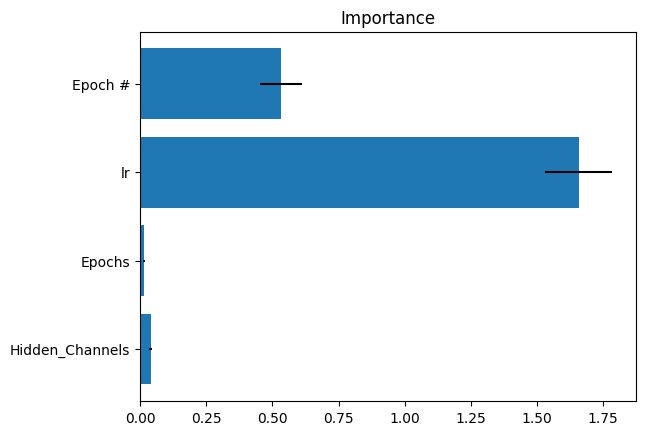

In [194]:
import matplotlib.pyplot as plt
plt.barh(y=col_X,width=importance["importances_mean"],xerr=importance["importances_std"])
plt.title("Importance")

In [176]:
pochoimportance = randomForest.feature_importances_

<BarContainer object of 4 artists>

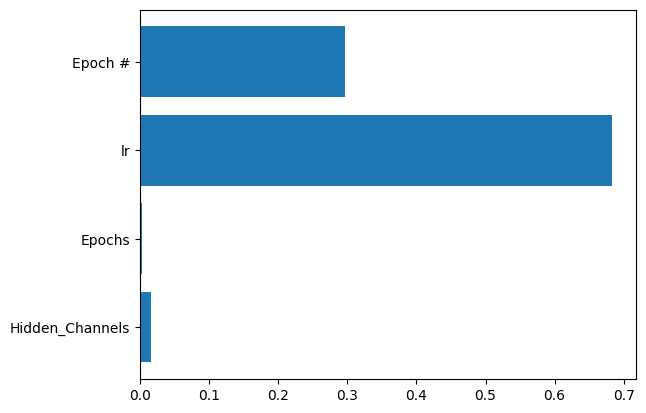

In [ ]:
plt.barh(y=col_X,width=pochoimportance)
# flatten exps =>[]...

# create group by exp mod at startup




# in tab 3 create identical exp and mod selectors, except they have different 
# ids and they dont save results

# when these new selectors are changed, trigger an alternate render function and 
# render tab 3 using selected mods and exps

# then access they group by with the key provided by the inputs and calculate
# importance and correlation

# store the importance and allat if it is the first time



# render the exp mods in the render callback


In [264]:
importance

{'importances_mean': array([0.576]),
 'importances_std': array([0.87985453]),
 'importances': array([[1.92, 0.  , 0.  , 1.92, 1.92, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 1.92, 0.  , 1.92, 0.  , 1.92]])}

In [287]:
import numpy as np
A = ["Apple","Orange",np.nan,np.nan]
is_str = [isinstance(val,str) for val in A]
is_str



[True, True, False, False]

In [299]:
import pandas as pd

da = pd.DataFrame({"A":["Apple","Orange",1,2]})

In [300]:
da["A"].fillna("Not specified")

0     Apple
1    Orange
2         1
3         2
Name: A, dtype: object

In [303]:
from utils.helpers import retrieve_results

results = retrieve_results()
grouped_exp_mod = results.groupby(["Experiment_name","Model_name"])

[INFO] retrieving results from c:\Users\oriol\GitHub_Repos\CNN-classification\experiment_logs\results


In [ ]:
for idx in grouped_exp_mod.indices:
    df = grouped_exp_mod.get_group(idx)
    

     Size  Coolness Fruit
0    0.05       NaN   NaN
1    0.05       NaN   NaN
2    0.05       NaN   NaN
3    0.05       NaN   NaN
4    0.05       NaN   NaN
..    ...       ...   ...
121  0.05       NaN   NaN
122  0.05       NaN   NaN
123  0.05       NaN   NaN
124  0.05       NaN   NaN
125  0.05       NaN   NaN

[126 rows x 3 columns]
     Size  Coolness Fruit
216   NaN       NaN   NaN
217   NaN       NaN   NaN
     Size  Coolness Fruit
218   NaN       NaN   NaN
219   NaN       NaN   NaN
220   NaN     100.0   NaN
221   NaN     100.0   NaN
     Size  Coolness Fruit
222  0.11       NaN   NaN
223  0.11       NaN   NaN
224  0.11       NaN   NaN
225  0.11       NaN   NaN
226  0.11       NaN   NaN
227  0.11       NaN   NaN
228  0.10       NaN   NaN
229  0.10       NaN   NaN
230  0.10       NaN   NaN
231  0.10       NaN   NaN
232  0.10       NaN   NaN
233  0.10       NaN   NaN
234  0.10       NaN   NaN
235  0.10       NaN   NaN
236  0.10       NaN   NaN
237  0.10       NaN   NaN
238  0.10     

In [307]:
importance_database

{'Big_sweep': {'TinyVGG_1': {'Hyperparameters': ['Hidden_Channels',
    'Epochs',
    'lr',
    'Epoch #'],
   'Correlation': array([-0.05293559, -0.07230701, -0.82156094, -0.32461589]),
   'p-value': array([5.56068170e-01, 4.21045311e-01, 4.76380539e-32, 2.08543109e-04]),
   'Importance': array([0.01325218, 0.00218998, 0.73222456, 0.25233328]),
   'Uncertainty': array([0.00642788, 0.00154759, 0.19189463, 0.07965817])}},
 'lr_sweep_size_01': {'TinyVGG_1': {'Hyperparameters': ['lr', 'Epoch #'],
   'Correlation': array([-0.58087135, -0.20760685]),
   'p-value': array([1.95028280e-09, 4.95939983e-02]),
   'Importance': array([0.88652433, 0.11347567]),
   'Uncertainty': array([0.15825859, 0.02688173])}},
 'New_model': {'Model_2': {'Hyperparameters': ['Epoch #'],
   'Correlation': array([-1.]),
   'p-value': array([1.]),
   'Importance': array([1.]),
   'Uncertainty': array([0.87985453])}}}

In [310]:
round(0.0796)

0

In [ ]:
import math
def round_nnz(x: float) -> float:
    """
    Round a float to the nearest non-zero decimal place.

    """
    if x == 0:
        return 0

    magnitude = math.floor(math.log10(abs(x))) # 10 ^ magnitude of the number

    # If number >= 1, round to nearest integer
    if magnitude >= 0:
        return round(x)
    
    # If number between 1 and 1e-4 round to nearest non-zero decimal
    decimals = abs(magnitude)
    return round(x, decimals)

In [69]:
round(0.99,1)

1.0

In [50]:
print(round_nnz(1.7))     # "123.5"
print(round_nnz(0.123456))    # "0.1"
print(round_nnz(0.0123456))   # "0.01"
print(round_nnz(0.0004567))   # "0.0005"
print(round_nnz(-0.0000456))   # "4.6e-05"
print(round_nnz(-0.0000123)) # "1.2e-07"
print(round_nnz(-0.0075))

2
0.1
0.01
0.0005
-5e-05
-1e-05
-0.007


In [51]:
print(round_nnz(0))

0


In [52]:
math.log10(1.7)

0.2304489213782739

In [53]:
round(1.7)

2

In [54]:
A = [0.000996356, 0.99, -0.9887, -145]

In [120]:
import pandas as pd
import numpy as np
df = pd.DataFrame({"One":['Apple',"Orange"],"Two":[0.98,0.88]})
from pandas.api.types import is_object_dtype
if is_object_dtype(df["One"]):
    df["One"] = pd.factorize( df["One"] )[0]
df["One"].dtype

dtype('int64')

In [132]:
df.loc[:,["One"]]

,One
0,0
1,1
